# Project Part 1

[![Kaggle](https://kaggle.com/static/images/open-in-kaggle.svg)](https://www.kaggle.com/code/itzelbailon/project-part1-languagedetection/)

## a) Introductory proposal

   I will use a Natural Language Processing model for language detection/prediction using a Kaggle data base (https://www.kaggle.com/datasets/basilb2s/language-detection). This database contains 2 columns, one for text details(sample text) with 10267 unique values, and one for Language with 17 different languages:
   1. English
   2. Malayalam
   3. Hindi
   4. Tamil
   5. Kannada
   6. French
   7. Spanish
   8. Portuguese
   9. Italian
   10. Russian
   11. Sweedish
   12. Dutch
   13. Arabic
   14. Turkish
   15. German
   16. Danish
   17. Greek
   
   
   Predicting a language is a multiclass classification problem, as the model will divide the observations into 17 categories. Support Vector Machines model will be used to predict the language.



## b) Exploratory Data Analysis

In [1]:
# import all of the python modules/packages you'll need here
import pandas as pd
import numpy as np
import re
from scipy.stats import norm
from matplotlib import pyplot
import matplotlib.pyplot as plt
import seaborn as sns
import nltk 
from sklearn.feature_extraction.text import CountVectorizer
from collections import  Counter
import warnings
warnings.simplefilter("ignore")
from wordcloud import WordCloud

# import the dataset
df = pd.read_csv("../input/language-detection/Language Detection.csv")
df

,Text,Language
0,"Nature, in the broadest sense, is the natural...",English
1,"""Nature"" can refer to the phenomena of the phy...",English
2,"The study of nature is a large, if not the onl...",English
3,"Although humans are part of nature, human acti...",English
4,[1] The word nature is borrowed from the Old F...,English
...,...,...
10332,ನಿಮ್ಮ ತಪ್ಪು ಏನು ಬಂದಿದೆಯೆಂದರೆ ಆ ದಿನದಿಂದ ನಿಮಗೆ ಒ...,Kannada
10333,ನಾರ್ಸಿಸಾ ತಾನು ಮೊದಲಿಗೆ ಹೆಣಗಾಡುತ್ತಿದ್ದ ಮಾರ್ಗಗಳನ್...,Kannada
10334,ಹೇಗೆ ' ನಾರ್ಸಿಸಿಸಮ್ ಈಗ ಮರಿಯನ್ ಅವರಿಗೆ ಸಂಭವಿಸಿದ ಎ...,Kannada
10335,ಅವಳು ಈಗ ಹೆಚ್ಚು ಚಿನ್ನದ ಬ್ರೆಡ್ ಬಯಸುವುದಿಲ್ಲ ಎಂದು ...,Kannada


In [2]:
#How many rows of data there is in this dataset
len(df)


10337

Knowing how many rows of data are in this dataset will give us an idea of how many repeated samples of text is in this dataset.

### Preprocessing

It's important to clean the data and take some preventive steps before doing the analysis.

First, let's convert the 'Text' column to string format in case there is some data not in string format.

In [3]:
df['Text']= df['Text'].astype(str)

Then, let's delete any row that might have missing text.

In [4]:
df=df[~df['Text'].isnull()]
len(df)


10337

Row number remained unchanged, no null values.

Now let's remove special characters and punctuation that are not helpful for analysis. Let's convert all text to lower case to avoid same words to be consider as different because of an uppercase. And finally let's remove numbers, since they are not used for translation purposes.

In [5]:
#Deleting the Special Characters and Punctuation

#This removes any characters that are not letters or numbers
df['preprocessed_text'] = df['Text'].str.replace('\W',' ') 


#Convert to lower case

df['preprocessed_text'] = df['preprocessed_text'].apply(lambda x: " ".join(x.lower() for x in x.split()))

#Remove numbers
df['preprocessed_text'] = df['preprocessed_text'].str.replace('\d+','')

df


,Text,Language,preprocessed_text
0,"Nature, in the broadest sense, is the natural...",English,nature in the broadest sense is the natural ph...
1,"""Nature"" can refer to the phenomena of the phy...",English,nature can refer to the phenomena of the physi...
2,"The study of nature is a large, if not the onl...",English,the study of nature is a large if not the only...
3,"Although humans are part of nature, human acti...",English,although humans are part of nature human activ...
4,[1] The word nature is borrowed from the Old F...,English,the word nature is borrowed from the old fren...
...,...,...,...
10332,ನಿಮ್ಮ ತಪ್ಪು ಏನು ಬಂದಿದೆಯೆಂದರೆ ಆ ದಿನದಿಂದ ನಿಮಗೆ ಒ...,Kannada,ನ ಮ ಮ ತಪ ಪ ಏನ ಬ ದ ದ ಯ ದರ ಆ ದ ನದ ದ ನ ಮಗ ಒಳ ಳ ಯದ...
10333,ನಾರ್ಸಿಸಾ ತಾನು ಮೊದಲಿಗೆ ಹೆಣಗಾಡುತ್ತಿದ್ದ ಮಾರ್ಗಗಳನ್...,Kannada,ನ ರ ಸ ಸ ತ ನ ಮ ದಲ ಗ ಹ ಣಗ ಡ ತ ತ ದ ದ ಮ ರ ಗಗಳನ ನ ಬ...
10334,ಹೇಗೆ ' ನಾರ್ಸಿಸಿಸಮ್ ಈಗ ಮರಿಯನ್ ಅವರಿಗೆ ಸಂಭವಿಸಿದ ಎ...,Kannada,ಹ ಗ ನ ರ ಸ ಸ ಸಮ ಈಗ ಮರ ಯನ ಅವರ ಗ ಸ ಭವ ಸ ದ ಎಲ ಲವನ ...
10335,ಅವಳು ಈಗ ಹೆಚ್ಚು ಚಿನ್ನದ ಬ್ರೆಡ್ ಬಯಸುವುದಿಲ್ಲ ಎಂದು ...,Kannada,ಅವಳ ಈಗ ಹ ಚ ಚ ಚ ನ ನದ ಬ ರ ಡ ಬಯಸ ವ ದ ಲ ಲ ಎ ದ ನ ನ ...


Remove duplicate text.

In [6]:
#Delete the Punctuation

#df['preprocessed_text'] = df['preprocessed_text'].str.replace('[^\w\s]', '')
#df['preprocessed_text'].head()


df.drop_duplicates(subset=['Text'],keep='first',inplace=True)
print(df.shape)
df.head(10)

(10267, 3)


,Text,Language,preprocessed_text
0,"Nature, in the broadest sense, is the natural...",English,nature in the broadest sense is the natural ph...
1,"""Nature"" can refer to the phenomena of the phy...",English,nature can refer to the phenomena of the physi...
2,"The study of nature is a large, if not the onl...",English,the study of nature is a large if not the only...
3,"Although humans are part of nature, human acti...",English,although humans are part of nature human activ...
4,[1] The word nature is borrowed from the Old F...,English,the word nature is borrowed from the old fren...
5,"[2] In ancient philosophy, natura is mostly us...",English,in ancient philosophy natura is mostly used a...
6,"[3][4] \nThe concept of nature as a whole, the...",English,the concept of nature as a whole the physica...
7,During the advent of modern scientific method ...,English,during the advent of modern scientific method ...
8,"[5][6] With the Industrial revolution, nature ...",English,with the industrial revolution nature increa...
9,"However, a vitalist vision of nature, closer t...",English,however a vitalist vision of nature closer to ...


### Data Analysis

To start the analysis, we will count how many text sample there is for each language and plotted to an histogram to visualize the distribution of the text sample across the languages.

In [7]:
df['Language'].value_counts()

English       1382
French        1006
Spanish        815
Portugeese     736
Italian        694
Russian        688
Sweedish       672
Malayalam      591
Dutch          541
Arabic         532
Turkish        471
German         465
Tamil          464
Danish         424
Kannada        366
Greek          358
Hindi           62
Name: Language, dtype: int64

<AxesSubplot:>

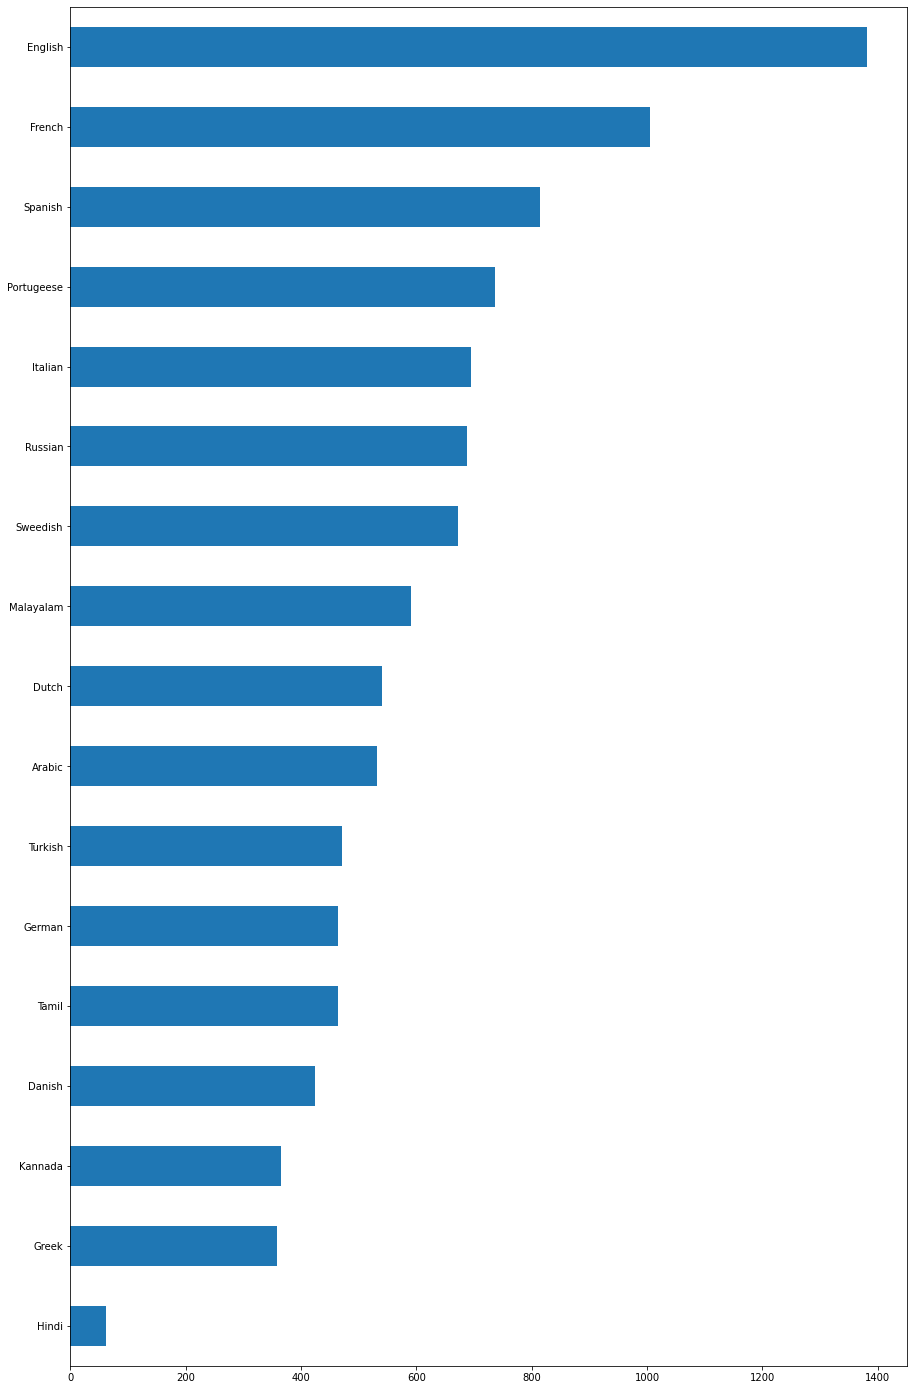

In [8]:
plt.figure(figsize=(15,25))


df['Language'].value_counts().sort_values().plot(kind = 'barh')

Then, we will look at the word count and lenght of each text sample.

In [9]:
df['text_len'] = df['preprocessed_text'].astype(str).apply(len)
df['word_count'] = df['preprocessed_text'].apply(lambda x: len(str(x).split()))
df


,Text,Language,preprocessed_text,text_len,word_count
0,"Nature, in the broadest sense, is the natural...",English,nature in the broadest sense is the natural ph...,79,13
1,"""Nature"" can refer to the phenomena of the phy...",English,nature can refer to the phenomena of the physi...,83,16
2,"The study of nature is a large, if not the onl...",English,the study of nature is a large if not the only...,62,14
3,"Although humans are part of nature, human acti...",English,although humans are part of nature human activ...,121,19
4,[1] The word nature is borrowed from the Old F...,English,the word nature is borrowed from the old fren...,182,30
...,...,...,...,...,...
10332,ನಿಮ್ಮ ತಪ್ಪು ಏನು ಬಂದಿದೆಯೆಂದರೆ ಆ ದಿನದಿಂದ ನಿಮಗೆ ಒ...,Kannada,ನ ಮ ಮ ತಪ ಪ ಏನ ಬ ದ ದ ಯ ದರ ಆ ದ ನದ ದ ನ ಮಗ ಒಳ ಳ ಯದ...,55,24
10333,ನಾರ್ಸಿಸಾ ತಾನು ಮೊದಲಿಗೆ ಹೆಣಗಾಡುತ್ತಿದ್ದ ಮಾರ್ಗಗಳನ್...,Kannada,ನ ರ ಸ ಸ ತ ನ ಮ ದಲ ಗ ಹ ಣಗ ಡ ತ ತ ದ ದ ಮ ರ ಗಗಳನ ನ ಬ...,201,84
10334,ಹೇಗೆ ' ನಾರ್ಸಿಸಿಸಮ್ ಈಗ ಮರಿಯನ್ ಅವರಿಗೆ ಸಂಭವಿಸಿದ ಎ...,Kannada,ಹ ಗ ನ ರ ಸ ಸ ಸಮ ಈಗ ಮರ ಯನ ಅವರ ಗ ಸ ಭವ ಸ ದ ಎಲ ಲವನ ...,87,35
10335,ಅವಳು ಈಗ ಹೆಚ್ಚು ಚಿನ್ನದ ಬ್ರೆಡ್ ಬಯಸುವುದಿಲ್ಲ ಎಂದು ...,Kannada,ಅವಳ ಈಗ ಹ ಚ ಚ ಚ ನ ನದ ಬ ರ ಡ ಬಯಸ ವ ದ ಲ ಲ ಎ ದ ನ ನ ...,59,26


Visualizing how many words each text sample have. 

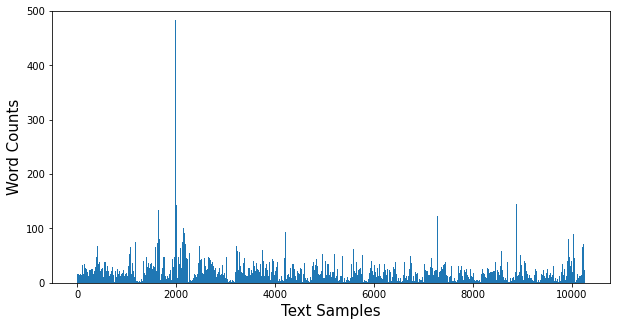

In [10]:
df['word_counts'] = df.preprocessed_text.apply(lambda x: len(x.split()))
plt.figure(figsize=(10,5))
plt.bar(np.arange(len(df.word_counts)), df.word_counts.values, width=1)
plt.ylim(0,500)
plt.xlabel("Text Samples", fontsize=15)
plt.ylabel("Word Counts", fontsize=15);


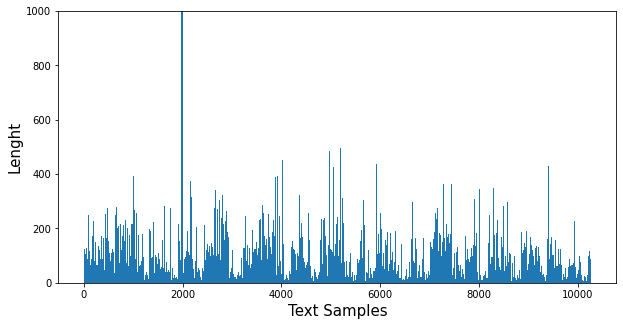

In [11]:
df['lenght'] = df.preprocessed_text.apply(lambda x: len(x))
plt.figure(figsize=(10,5))
plt.bar(np.arange(len(df.lenght)), df.lenght.values, width=1)
plt.ylim(0,1000)
plt.xlabel("Text Samples", fontsize=15)
plt.ylabel("Lenght", fontsize=15);



In [12]:
#wordcloud = WordCloud(background_color="white",width=1600, height=800).generate(' '.join(df['Text'].tolist()))
#plt.figure( figsize=(20,10), facecolor='k')
#plt.imshow(wordcloud)
